(1437, 64) (1437,) (360, 64) (360,)


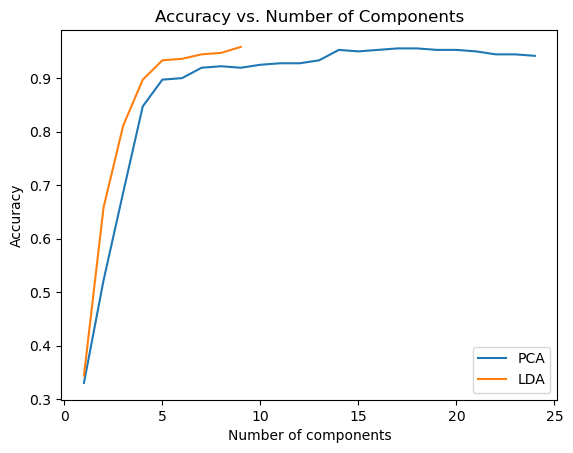

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create lists to store the accuracy for each reduced dimension
pca_acc = []
lda_acc = []

# Perform PCA and LDA for different number of components
for i in range(1, 25):
    # PCA
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)
    pca_acc.append(knn.score(X_test_pca, y_test))
    

for i in range(1, 10):
    # LDA
    lda = LinearDiscriminantAnalysis(n_components=i)
    X_train_lda = lda.fit_transform(X_train_std, y_train)
    X_test_lda = lda.transform(X_test_std)

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_lda, y_train)
    lda_acc.append(knn.score(X_test_lda, y_test))

# Plot the accuracy for each reduced dimension
fig, ax = plt.subplots()
ax.plot(range(1, 25), pca_acc, label='PCA')
ax.plot(range(1, 10), lda_acc, label='LDA')
ax.set_xlabel('Number of components')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs. Number of Components')
ax.legend()
plt.show()
